# 실습 설명
대형 마트 고객 데이터를 가지고 RFM 분석을 해 봅시다. 데이터에는 고객의 출생 연도와 소득, 최근에 언제 구매를 했는지, 어떤 품목에 얼마나 많은 돈을 썼는지, 구매를 얼마나 자주 했는지, 프로모션에는 얼마나 참여했는지 등 다양한 정보가 담겨 있어요. 최종 목표는 RFM 분석을 통해 고객 세그먼트를 나눠 보고, 매출에 크게 기여하는 고객들을 놓치지 않기 위해 어떤 마케팅 전략을 수립하면 좋을지 생각해 보는 겁니다. 어떻게 해야 할지 잘 모르겠다면 아래 가이드라인을 참고하여 코드를 작성해 보세요!

데이터 설명
이번 실습에 사용되는 데이터는 컬럼의 개수도 많고 컬럼 이름도 영어로 되어 있는데요. 이곳에 각 컬럼의 의미를 설명해 둘 테니 이를 토대로 실습을 진행하시기 바랍니다. 참고로 이 데이터에는 2020년 10월부터 2022년 9월까지 가입한 고객들의 정보가 들어 있어요. 2023년 1월을 기준으로 데이터를 분석한다고 가정하고 프로젝트를 진행해 보세요!

ID: 임의의 값으로 부여된 고객 아이디
signup_ym: 고객 가입 연월
birth_year: 출생 연도
annual_income: 연 소득
marital_status: 혼인 상태
children: 부양 자녀 수
recency: 마지막 구매일로부터 기준 시점까지 경과된 날
amount_alcohol: 주류 구매 금액
amount_fruit: 과일 구매 금액
amount_meat: 육류 구매 금액
amount_fish: 수산물 구매 금액
amount_snack: 과자 구매 금액
amount_general: 잡화 구매 금액
num_purchase_web: 웹 페이지를 통한 구매 횟수
num_purchase_store: 매장 방문을 통한 구매 횟수
num_purchase_discount: 할인을 통한 구매 횟수
promotion_{숫자}: 프로모션 1부터 프로모션 6까지 각각 참여했는지 여부를 나타내며 참여 시 1, 아닐 시 0으로 표시
revenue: 수익

## 가이드라인

### 1. 데이터 불러오기
data 폴더 안에 있는 customer_data.csv 파일을 DataFrame으로 불러옵시다.
### 2. 데이터 탐색 및 전처리
데이터 개수, 컬럼별 데이터 타입, 통계 정보, 결측값 존재 여부 등을 확인해 보세요.
각 컬럼이 어떤 값들로 이루어져 있는지 확인해 보세요.
결측값이 있다면 다른 값으로 채우거나 해당 로우를 제거해 보세요.
고객마다 총 구매 금액, 총 구매 횟수를 계산해 보세요.
데이터 분석에 불필요한 컬럼은 없는지 확인해 보세요.
### 3. 데이터 분석
고객들의 연령, 소득, 가족 구성 등 인구통계학적 정보를 파악해 보세요.
이상값이 존재한다면 적절히 처리해 보세요.
RFM 분석 방법에 따라 고객 세그먼트를 분류해 보세요.
고객 세그먼트별로 고객 특성 및 소비 성향을 분석해 보세요.
더 알아보고 싶은 게 있다면 원하는 대로 자유롭게 데이터를 탐색해 보세요!


## 1. 데이터 불러오기

In [315]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt   # as in Pycharm
import seaborn as sns

from matplotlib import rc 

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [316]:
df = pd.read_csv('data/customer_data.csv', sep='\t')
df

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2021-09,1975,79589900.0,배우자 있음,1,46,921700,55900,236600,...,9,4,2,0,0,0,0,0,0,11
2236,4001,2022-09,1954,83218200.0,배우자 있음,3,56,527800,0,39000,...,8,5,7,1,0,0,0,0,0,11
2237,7270,2022-04,1989,74075300.0,이혼,0,91,1180400,62400,282100,...,2,13,1,0,0,0,1,0,0,11
2238,8235,2022-04,1964,90018500.0,배우자 있음,1,8,556400,39000,278200,...,6,10,2,0,0,0,0,0,0,11


## 2. 데이터 탐색 및 전처리

In [317]:
df.shape

(2240, 23)

In [318]:
df.dtypes

ID                         int64
signup_ym                 object
birth_year                 int64
annual_income            float64
marital_status            object
children                   int64
recency                    int64
amount_alcohol             int64
amount_fruit               int64
amount_meat                int64
amount_fish                int64
amount_snack               int64
amount_general             int64
num_purchase_web           int64
num_purchase_store         int64
num_purchase_discount      int64
promotion_1                int64
promotion_2                int64
promotion_3                int64
promotion_4                int64
promotion_5                int64
promotion_6                int64
revenue                    int64
dtype: object

In [319]:
df.describe(include='all')

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
count,2240.000000,2240,2240.000000,2.216000e+03,2240,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0
unique,NaN,24,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2021-12,NaN,NaN,배우자 있음,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,111,NaN,NaN,1444,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,NaN,1976.805804,6.792143e+07,NaN,0.950446,49.109375,3.951164e+05,34192.901786,2.170350e+05,...,4.084821,5.790179,2.325000,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,11.0
std,3246.662198,NaN,11.984069,3.272500e+07,NaN,0.751803,28.962453,4.375766e+05,51705.463894,2.934300e+05,...,2.778714,3.250958,1.932238,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,0.0
min,0.000000,NaN,1901.000000,2.249000e+06,NaN,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
25%,2828.250000,NaN,1967.000000,4.589390e+07,NaN,0.000000,24.000000,3.087500e+04,1300.000000,2.080000e+04,...,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
50%,5458.500000,NaN,1978.000000,6.679595e+07,NaN,1.000000,49.000000,2.255500e+05,10400.000000,8.710000e+04,...,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
75%,8427.750000,NaN,1985.000000,8.907860e+07,NaN,1.000000,74.000000,6.555250e+05,42900.000000,3.016000e+05,...,6.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0


In [320]:
df.isnull().sum()

ID                        0
signup_ym                 0
birth_year                0
annual_income            24
marital_status            0
children                  0
recency                   0
amount_alcohol            0
amount_fruit              0
amount_meat               0
amount_fish               0
amount_snack              0
amount_general            0
num_purchase_web          0
num_purchase_store        0
num_purchase_discount     0
promotion_1               0
promotion_2               0
promotion_3               0
promotion_4               0
promotion_5               0
promotion_6               0
revenue                   0
dtype: int64

In [321]:
# 결측값 제거
df.dropna(inplace=True)

In [322]:
df.isnull().sum()

ID                       0
signup_ym                0
birth_year               0
annual_income            0
marital_status           0
children                 0
recency                  0
amount_alcohol           0
amount_fruit             0
amount_meat              0
amount_fish              0
amount_snack             0
amount_general           0
num_purchase_web         0
num_purchase_store       0
num_purchase_discount    0
promotion_1              0
promotion_2              0
promotion_3              0
promotion_4              0
promotion_5              0
promotion_6              0
revenue                  0
dtype: int64

In [323]:
df['age'] = 2022 - df['birth_year']
df

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,age
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,4,3,0,0,0,0,0,1,11,57
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,2,2,0,0,0,0,0,0,11,60
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,10,1,0,0,0,0,0,0,11,49
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,4,2,0,0,0,0,0,0,11,30
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,6,5,0,0,0,0,0,0,11,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2021-09,1975,79589900.0,배우자 있음,1,46,921700,55900,236600,...,4,2,0,0,0,0,0,0,11,47
2236,4001,2022-09,1954,83218200.0,배우자 있음,3,56,527800,0,39000,...,5,7,1,0,0,0,0,0,11,68
2237,7270,2022-04,1989,74075300.0,이혼,0,91,1180400,62400,282100,...,13,1,0,0,0,1,0,0,11,33
2238,8235,2022-04,1964,90018500.0,배우자 있음,1,8,556400,39000,278200,...,10,2,0,0,0,0,0,0,11,58


Text(0, 0.5, '고객 수(명)')

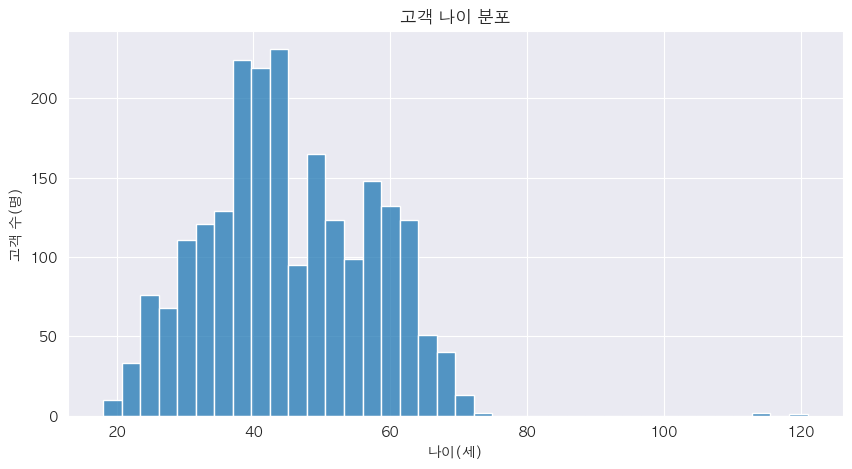

In [324]:
# 나이분포 파악하기
plt.rcParams['figure.figsize'] = (10, 5)
sns.histplot(data=df['age'])
plt.title('고객 나이 분포')
plt.xlabel('나이(세)')
plt.ylabel('고객 수(명)')

30대 후반에서 40대 초반 고객의 수가 많은 것으로 보이네요. 반면 20대와 70대에 가까워질수록 점점 고객의 수가 줄어들고 있습니다. 
그런데 자세히 보니 나이가 120세에 가까운 고객이 몇 명 있다고 나오는군요. 생물학적으로 불가능에 가까운 데이터죠.

고객 데이터를 나이가 많은 순으로 정렬해 실제로 어떤 데이터가 있는지 확인해 봅시다. sort_values() 함수를 사용하면 되는데요. 
age 컬럼을 기준으로 정렬하므로 by 파라미터에는 'age'를 전달하고, 내림차순으로 정렬해야 하니 ascending 파라미터에는 False를 넣어 줍시다.

In [325]:
df.sort_values(by='age', ascending=False)

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,age
239,11004,2022-08,1901,78236600.0,미혼,1,23,10400,0,6500,...,2,1,0,0,0,0,0,0,11,121
339,1150,2021-12,1907,108591600.0,배우자 있음,0,36,981500,187200,730600,...,4,1,0,0,0,0,1,0,11,115
192,7829,2021-12,1908,47632000.0,이혼,1,99,19500,7800,10400,...,2,1,0,0,0,0,0,0,11,114
1950,6663,2021-10,1948,66483300.0,미혼,0,96,187200,0,9100,...,4,1,0,0,0,0,0,0,11,74
424,6932,2021-07,1949,120935100.0,배우자 있음,0,77,1670500,54600,930800,...,5,0,0,0,0,0,1,0,11,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,10548,2022-06,2003,92511900.0,미혼,0,30,367900,22100,483600,...,12,1,0,0,0,0,0,0,11,19
2213,3661,2021-01,2003,104802100.0,미혼,0,42,772200,66300,820300,...,8,1,0,0,0,0,0,0,11,19
1850,4427,2020-12,2003,108234100.0,미혼,0,56,696800,35100,767000,...,12,1,0,0,1,0,1,1,11,19
1170,193,2022-05,2004,18747300.0,배우자 있음,0,81,0,0,2600,...,2,1,0,0,1,0,0,0,11,18


고객 중 가장 어린 사람은 19세로 납득할 만한 반면, 가장 나이가 많은 사람은 122세로 현실적이지 않습니다. 그 밑으로 나이가 115세, 116세인 고객도 존재하네요. 아마 생년이 잘못 기입되어 발생한 이상값인 것 같아요. 나이를 제외한 나머지 컬럼들을 이용해 유사한 고객을 찾아서 나이를 추정해 볼 수도 있겠지만, 이상값이 포함된 고객이 세 명뿐이니 그냥 제거하겠습니다. 115세 다음으로 나이가 많은 고객이 75세이므로 대강 100세 미만의 고객만 골라 customer_df 변수에 다시 담아 줄게요.

In [326]:
df = df[df['age'] < 100]

Text(0, 0.5, '고객 수(명)')

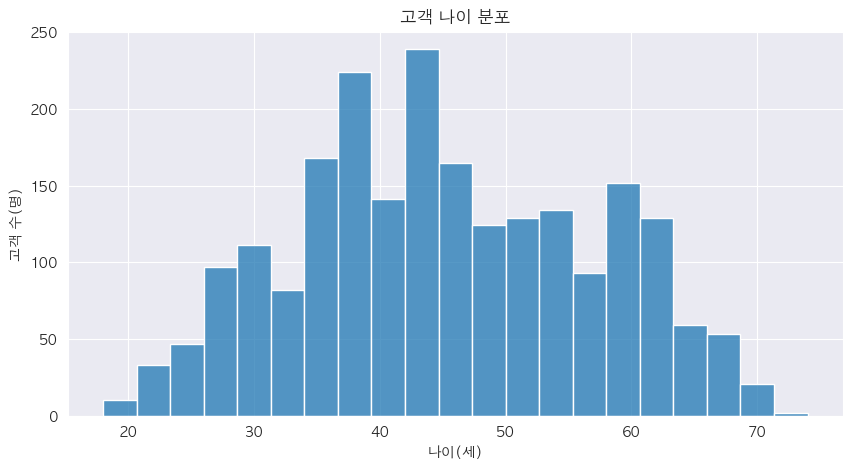

In [327]:
sns.histplot(data=df['age'])
plt.title('고객 나이 분포')
plt.xlabel('나이(세)')
plt.ylabel('고객 수(명)')

In [328]:
age_bins = list(range(10, 81, 10))
age_bins

[10, 20, 30, 40, 50, 60, 70, 80]

In [329]:
age_labels = [f'{x}대' for x in age_bins[:-1]]
age_labels

['10대', '20대', '30대', '40대', '50대', '60대', '70대']

In [330]:
age_group = pd.cut(x=df['age'], bins=age_bins, labels=age_labels, right=False)

In [331]:
df.insert(
    loc=df.columns.get_loc('age') + 1,
    column='age_group',
    value=age_group,
)
df.head()

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,age,age_group
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,3,0,0,0,0,0,1,11,57,50대
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,2,0,0,0,0,0,0,11,60,60대
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,1,0,0,0,0,0,0,11,49,40대
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,0,0,0,0,0,0,11,30,30대
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,0,0,0,0,0,0,11,33,30대


In [332]:
df['age_group'].value_counts()

age_group
40대    669
30대    553
50대    459
60대    298
20대    212
70대     15
10대      7
Name: count, dtype: int64

In [333]:
age_group_replace_dict = {
    '10대': '20대 이하',
    '20대': '20대 이하',
    '60대': '60대 이상',
    '70대': '60대 이상',
}
df['age_group'] = df['age_group'].replace(age_group_replace_dict)

/var/folders/vh/dzvlggfx64b5xndshnbz77540000gn/T/ipykernel_84617/1016635330.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = df['age_group'].replace(age_group_replace_dict)


In [334]:
df['age_group'].value_counts()

age_group
40대       669
30대       553
50대       459
60대 이상    313
20대 이하    219
Name: count, dtype: int64

## 연 소득 분포 파악하기
이번에는 고객 연 소득 분포를 살펴볼게요. 나이 분포 때와 마찬가지로 seaborn의 histplot()을 이용하면 한눈에 확인할 수 있겠죠. 
이번에도 그래프 크기와 제목, 그리고 X축과 Y축의 이름까지 설정하겠습니다.

Text(0, 0.5, '고객 수(명)')

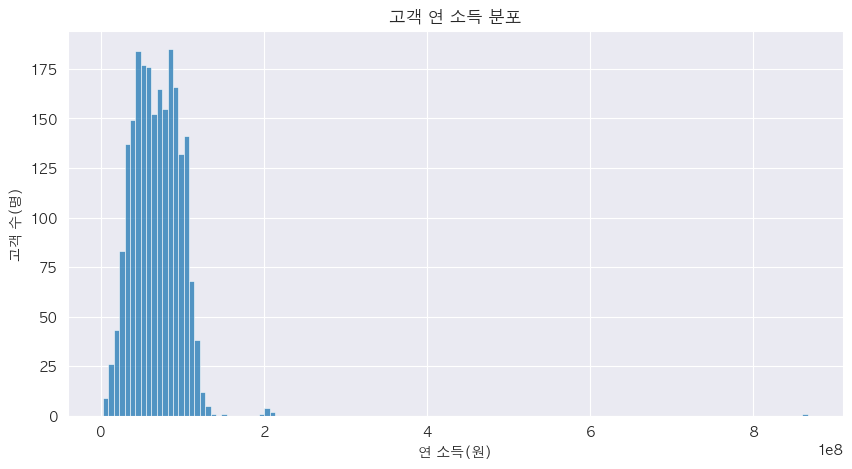

In [335]:
sns.histplot(data=df['annual_income'])
plt.title('고객 연 소득 분포')
plt.xlabel('연 소득(원)')
plt.ylabel('고객 수(명)')

그래프를 보니 연 소득에도 이상값이 존재하는 것 같은데요.

<Axes: xlabel='annual_income'>

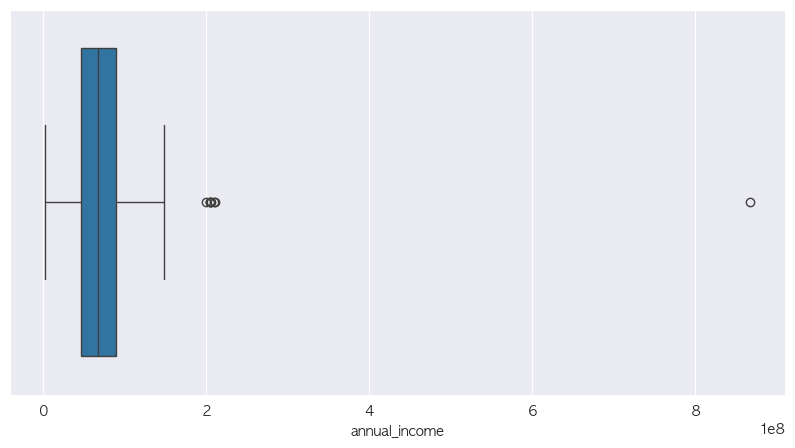

In [336]:
sns.boxplot(data=df, x='annual_income')

In [337]:
q1 = df['annual_income'].quantile(0.25)
q3 = df['annual_income'].quantile(0.75)
iqr = q3-q1

In [338]:
# 이상값 처리
cond = (q1 - (iqr*1.5) > df['annual_income']) | (q3 + (iqr*1.5) < df['annual_income'])
df[cond].index

Index([164, 617, 655, 687, 1300, 1653, 2132, 2233], dtype='int64')

In [339]:
df.drop(df[cond].index, inplace=True)

/var/folders/vh/dzvlggfx64b5xndshnbz77540000gn/T/ipykernel_84617/3306044492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[cond].index, inplace=True)


In [340]:
df[cond].index

/var/folders/vh/dzvlggfx64b5xndshnbz77540000gn/T/ipykernel_84617/1371063403.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[cond].index


Index([], dtype='int64')

<Axes: xlabel='annual_income'>

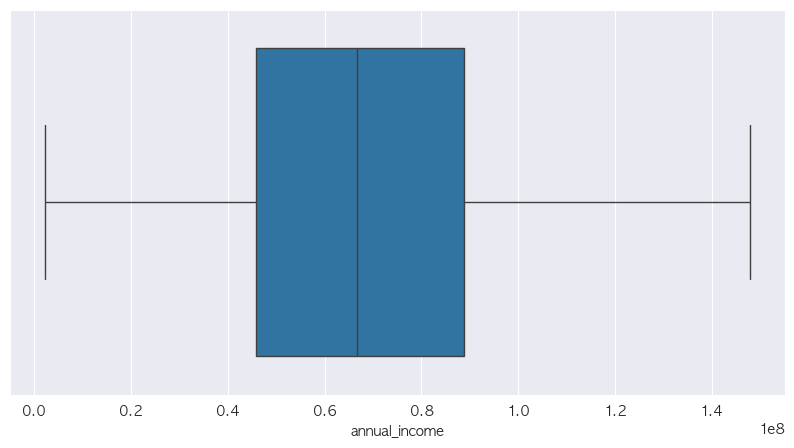

In [341]:
sns.boxplot(data=df, x='annual_income')

## 3. 데이터분석

In [342]:
# 고객마다 총 구매금액
df['amount_total'] = df['amount_alcohol'] + df['amount_fruit'] + df['amount_meat'] + df['amount_fish'] + df['amount_snack'] + df['amount_general']

/var/folders/vh/dzvlggfx64b5xndshnbz77540000gn/T/ipykernel_84617/2474033051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount_total'] = df['amount_alcohol'] + df['amount_fruit'] + df['amount_meat'] + df['amount_fish'] + df['amount_snack'] + df['amount_general']


In [343]:
# 고객의 구매 횟수
df['num_purchase_total'] = df['num_purchase_discount'] + df['num_purchase_store'] + df['num_purchase_web']

/var/folders/vh/dzvlggfx64b5xndshnbz77540000gn/T/ipykernel_84617/2313674132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_purchase_total'] = df['num_purchase_discount'] + df['num_purchase_store'] + df['num_purchase_web']


In [344]:
rfm_df = df[['recency', 'num_purchase_total', 'amount_total']]
rfm_df  

,recency,num_purchase_total,amount_total
0,58,15,2102100
1,38,5,35100
2,26,19,1008800
3,26,8,68900
4,94,16,548600
...,...,...,...
2235,46,15,1743300
2236,56,20,577200
2237,91,16,1613300
2238,8,18,1095900


In [345]:
rfm_df.describe()

,recency,num_purchase_total,amount_total
count,2205.000000,2205.000000,2.205000e+03
mean,49.009070,12.242630,7.888683e+05
std,28.932111,5.843435,7.821779e+05
min,0.000000,0.000000,6.500000e+03
25%,24.000000,7.000000,8.970000e+04
50%,49.000000,12.000000,5.161000e+05
75%,74.000000,17.000000,1.361100e+06
max,99.000000,33.000000,3.282500e+06


## Recency, Frequency, Monetary 등급 매기기
우선 Recency, Frequency, Monetary 각 항목의 등급 개수를 지정해야 합니다. 편의상 3개로 하여 1등급, 2등급, 3등급으로 나누겠습니다. 이때 등급의 숫자는 클수록 더 긍정적인 것으로 가정할게요. 즉, Recency 등급의 숫자는 클수록 더 최근에 구매했다는 뜻이고, Frequency 등급의 숫자는 클수록 더 자주 구매했다는 뜻이며, Monetary 등급의 숫자는 클수록 돈을 더 많이 썼다는 의미가 됩니다. 등급 개수는 앞으로 자주 사용할 예정이라서 미리 num_grades라는 변수에 담아 놓겠습니다.

In [346]:
num_grades = 3

그리고 customer_df에 Recency, Frequency, Monetary 각 항목의 등급을 숫자로 표시하기 위해 grade_labels라는 리스트 변수도 미리 만들어 놓을게요.

In [347]:
grade_labels = list(range(1, num_grades + 1))
grade_labels

[1, 2, 3]

먼저 Recency 등급부터 매겨 볼게요. customer_df에서는 recency 컬럼을 보면 되겠군요. 
이번 해설 노트에서는 편의상 각 등급마다 고객의 수를 최대한 균등하게 나누겠습니다. 
이런 방식에 사용되는 함수는 qcut()으로, x 파라미터에 넣어 준 데이터를 q 파라미터에 넣어 준 값만큼 등분해 줍니다. 
이 함수에서는 labels 파라미터를 통해 각 등급을 어떻게 표시할지 지정할 수 있는데요. 
recency 컬럼 값이 작은 고객일수록 최근에 구매를 했다는 뜻이니 Recency 등급을 더 높게 부여해야 합니다. 

즉, qcut()을 통해 고객을 세 그룹으로 나누었을 때 앞 그룹이 3등급, 중간 그룹이 2등급, 뒷 그룹이 1등급이 되는 거죠. 
따라서 labels 파라미터에 grade_labels를 역순으로 넣어 줘야 해요. 
역순으로 뒤집힌 리스트는 원본 리스트를 [::-1]처럼 슬라이싱 해 주면 얻을 수 있습니다. 
그럼 qcut() 함수의 x에 recency 컬럼 데이터를 전달하고, q에는 num_grades 변수를 전달하고, labels에는 grade_labels[::-1]을 전달해 볼게요.

In [348]:
# 데이터를 개수에맞게 3등분
# 등급 라벨을 역순해줘야 앞그룹부터 1등급시작
recency_grade = pd.qcut(x=df['recency'], q=num_grades, labels=grade_labels[::-1])

이렇게 만들어진 Recency 등급 데이터는 recency_grade라는 이름의 컬럼으로 customer_df에 추가하겠습니다.

In [349]:
df['recency_grade'] = recency_grade

/var/folders/vh/dzvlggfx64b5xndshnbz77540000gn/T/ipykernel_84617/4152851442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recency_grade'] = recency_grade


recency_grade 컬럼에 value_counts()를 적용해 보면, 
1등급부터 3등급까지 정확히 똑같이 분배된 건 아니지만 비슷한 비율로 나뉘었음을 확인할 수 있습니다.

In [350]:
df['recency_grade'].value_counts()

recency_grade
3    752
1    730
2    723
Name: count, dtype: int64

그럼 Recency 등급에 따라 매출 기여도가 어떻게 다른지 시각화해 볼까요? 
각 등급의 매출 기여도는 전체 매출 대비 해당 등급의 매출 비율로 구할 수 있습니다. 

그렇다면 먼저 recency_grade 컬럼 기준으로 groupby 한 다음 sum() 함수를 써서 등급별 매출 합계를 구해야겠군요. 
sum() 함수를 사용할 때에는 숫자 값들만 합을 구할 수 있게 numeric_only 값을 True로 설정하겠습니다. 
마지막으로 reset_index() 함수까지 사용해 주면 깔끔하게 recency_grade도 컬럼으로 만들 수 있어요. 
이 groupby 결과는 groupby_recency_grade 변수에 담겠습니다. 
1등급에서 3등급으로 갈수록 recency 컬럼의 값이 줄어드는 걸 보면 등급이 제대로 매겨진 것 같군요.




In [351]:
groupby_recency_grade = df.groupby('recency_grade').sum(numeric_only=True).reset_index()
groupby_recency_grade

/var/folders/vh/dzvlggfx64b5xndshnbz77540000gn/T/ipykernel_84617/2207962456.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_recency_grade = df.groupby('recency_grade').sum(numeric_only=True).reset_index()


,recency_grade,ID,birth_year,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,...,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,age,amount_total,num_purchase_total
0,3,4338743,1486970,5.059218e+10,678,11988,293945600,26728000,157576900,37583000,...,54,12,67,55,60,179,8272,33574,583858600,9182
1,2,4001190,1428892,4.818995e+10,724,35840,294073000,23675600,151742500,35046700,...,47,8,47,52,48,95,7953,33014,570953500,9003
2,1,3975961,1443212,4.919261e+10,690,60237,289602300,25281100,164547500,35599200,...,41,10,49,57,53,59,8030,32848,584642500,8810


groupby_recency_grade의 amount_total 컬럼에 대해 파이 차트를 그려 주면 등급별로 매출 기여도가 어떻게 다른지 한눈에 볼 수 있습니다. plot() 함수에서 kind를 'pie'로 설정해 주면 되겠죠.

<Axes: ylabel='amount_total'>

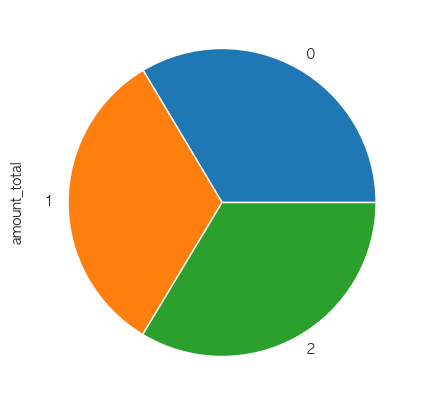

In [352]:
groupby_recency_grade['amount_total'].plot(kind='pie')

<Axes: title={'center': 'Recency 등급별 매출 기여도'}>

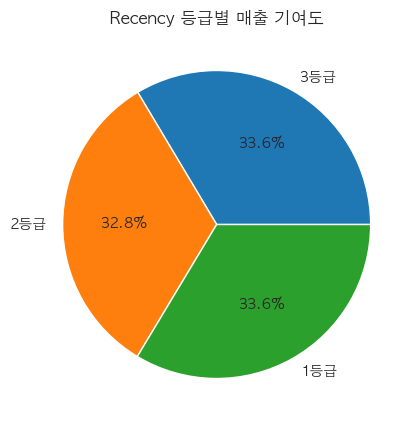

In [353]:
groupby_recency_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels[::-1]],
    title='Recency 등급별 매출 기여도',
    ylabel='',
)

이번에는 Frequency 등급을 매겨 볼게요. Frequency와 관련된 컬럼은 num_purchase_total이죠. 
Recency와 마찬가지로 qcut() 함수를 이용해 등급을 나누겠습니다. 주의할 점이 하나 있는데요. 
num_purchase_total 컬럼은 값이 클수록 더 자주 구매를 했다는 뜻이므로 더 높은 등급이 매겨져야 합니다. 
그래서 이번에는 labels에 grade_labels 리스트를 그대로 전달해 줘야 해요. 
qcut() 함수 결과는 customer_df에 frequency_grade라는 이름의 컬럼으로 추가하겠습니다.

In [354]:
df['frequency_grade'] = pd.qcut(
    x=df['num_purchase_total'], q=num_grades, labels=grade_labels
)

/var/folders/vh/dzvlggfx64b5xndshnbz77540000gn/T/ipykernel_84617/2714661268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['frequency_grade'] = pd.qcut(


In [355]:
df['frequency_grade'].value_counts()

frequency_grade
1    851
2    679
3    675
Name: count, dtype: int64

Frequency도 등급별 매출 기여도를 파이 차트로 그려 봅시다. 
Recency 때와 비슷하게 frequency_grade 컬럼에 대해 groupby 한 뒤 sum() 함수를 사용할게요. 
이 groupby 결과의 amount_total 컬럼에 대해 파이 차트를 그리면 되겠습니다. 
시각화한 걸 보니 매출 기여도는 3등급, 2등급, 1등급 순으로 높군요. 
3등급과 2등급의 매출 기여도 차이는 그리 크지 않고, 둘에 비해 1등급의 매출 기여도가 상당히 낮습니다. 
1등급 고객의 수가 더 많은데도 이런 결과가 나오다니 흥미롭네요.

/var/folders/vh/dzvlggfx64b5xndshnbz77540000gn/T/ipykernel_84617/2203580453.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_frequency_grade = df.groupby('frequency_grade').sum(numeric_only=True).reset_index()


<Axes: title={'center': 'Frequency 등급별 매출 기여도'}>

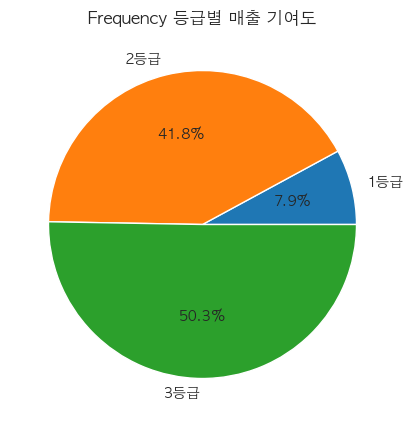

In [356]:
groupby_frequency_grade = df.groupby('frequency_grade').sum(numeric_only=True).reset_index()
groupby_frequency_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='Frequency 등급별 매출 기여도',
    ylabel='',
)

마지막으로 Monetary 등급을 구할 차례입니다. 이번에는 amount_total 컬럼을 구간화하면 되겠죠. 
Monetary는 구매 금액을 뜻하므로 Frequency와 마찬가지로 숫자가 클수록 더 높은 등급이 매겨져야 할 거예요. 
qcut() 함수로 등급을 나눈 뒤 customer_df에 monetary_grade라는 컬럼으로 추가하겠습니다.

In [357]:
df['monetary_grade'] = pd.qcut(
    x=df['amount_total'], q=num_grades, labels=grade_labels
)

/var/folders/vh/dzvlggfx64b5xndshnbz77540000gn/T/ipykernel_84617/2343856283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['monetary_grade'] = pd.qcut(


In [358]:
df['monetary_grade'].value_counts()

monetary_grade
1    735
2    735
3    735
Name: count, dtype: int64

이제 Monetary 등급에 따라 매출 기여도가 어떻게 다른지 파이 차트로 그려 볼게요. 
결과를 보면 3등급의 매출 기여도가 매우 높고 1등급의 매출 기여도는 아주 낮게 나오네요. 
아무래도 Monetary 등급은 돈을 얼마나 썼는지와 직접적으로 관련되기 때문에 그만큼 매출 기여도가 명확히 구분되는 것 같습니다.

/var/folders/vh/dzvlggfx64b5xndshnbz77540000gn/T/ipykernel_84617/548740859.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_monetary_grade = df.groupby('monetary_grade').sum(numeric_only=True).reset_index()


<Axes: title={'center': 'Monetary 등급별 매출 기여도'}>

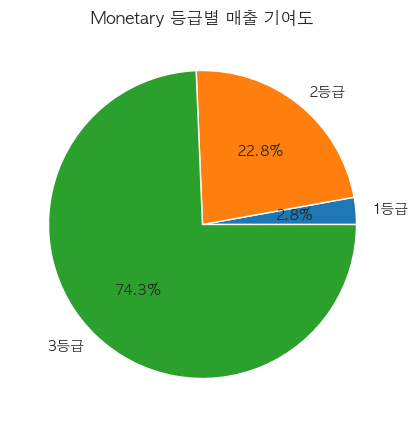

In [359]:
groupby_monetary_grade = df.groupby('monetary_grade').sum(numeric_only=True).reset_index()
groupby_monetary_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='Monetary 등급별 매출 기여도',
    ylabel='',
)

## 가중합을 이용해 RFM 고객 세그먼트 분류하기
Recency, Frequency, Monetary 각 항목의 등급을 모두 매겼으니 이제 이를 활용해 고객 지표를 구하고 고객 세그먼트 분류까지 해 볼게요. 
먼저 Recency, Frequency, Monetary 등급 각각에 가중치를 곱한 뒤 더하면 고객 지표가 계산됩니다. 
이 고객 지표를 몇 가지 등급으로 나누면 최종 고객 세그먼트를 구할 수 있죠. 
그럼 RFM 고객 세그먼트의 등급 개수도 3개로 두고 진행해 보겠습니다. 
혹시 RFM 분석 방법이 잘 기억나지 않는다면 여기를 참고해 주세요.

일단 세 항목에 동일하게 가중치를 줄 때 고객 세그먼트가 어떻게 나오는지 확인해 볼까요? 
세 항목에 대한 가중치에는 조건이 있었죠. 
각각 0보다 크거나 같아야 하고 모두 더했을 때 1이 되어야 합니다. 가중치 조건을 고려했을 때 각 항목에 1/3씩 가중치를 부여하면 되겠군요. 
가중치는 weight라는 이름의 딕셔너리 변수를 이용해 관리하겠습니다.

In [360]:
weight = {}
weight['recency'] = 1 / 3
weight['frequency'] = 1 / 3
weight['monetary'] = 1 / 3

여기서 주의할 점이 하나 있는데요. 


customer_df에 Recency, Frequency, Monetary 각 등급이 숫자 1, 2, 3으로 표시되어 있지만, 
엄밀히 말하면 등급 값은 모두 숫자형 데이터가 아니라 범주형 데이터인 상태입니다. 
가중치를 적용하는 연산을 하려면 astype() 함수를 이용해 숫자형 데이터로 바꿔 줘야 해요. 
어차피 등급 값은 1, 2, 3 뿐이니 정수형으로 바꿔도 무방하겠습니다. 
그럼 항목에 맞게 가중치와 등급을 곱한 뒤 더해 줍시다. 이렇게 구한 고객 지표는 customer_df에 rfm_score 컬럼으로 추가할게요.

In [361]:
df['rfm_score'] = (
    weight['recency'] * df['recency_grade'].astype('int')
    + weight['frequency'] * df['frequency_grade'].astype('int')
    + weight['monetary'] * df['monetary_grade'].astype('int')
)

/var/folders/vh/dzvlggfx64b5xndshnbz77540000gn/T/ipykernel_84617/2856532442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rfm_score'] = (


이제 고객 지표를 세 등급으로 구간화하면 고객 세그먼트 분류를 마칠 수 있습니다. 
고객 지표는 그 범위가 1 이상 3 이하일 수밖에 없는데요. 
Recency, Frequency, Monetary 모두 등급 값이 1, 2, 3으로 한정되어 있고, 각 가중치는 모두 더해서 1이라는 제약 조건까지 있기 때문입니다. 
최솟값과 최댓값이 확실하게 정해져 있으니 등급마다 고객 수를 균등하게 분배하기보다는, 최솟값과 최댓값을 고려하여 동일한 크기의 구간으로 고객을 분류해 볼게요. 아래와 같이 구간을 정하면 세 구간의 크기가 모두 2/3가 되겠죠? 
물론 구간 경계에서 이상과 초과, 이하와 미만의 차이 때문에 2등급 고객의 수가 더 많아질 가능성이 있긴 합니다.

고객 지표 구간   | 등급
1이상 5/3미만   | 1등급
5.3이상 7/3이하 | 2등급
7/3초과 3이하   | 3등급

이렇게 구간 경계의 포함 여부가 일관되지 않은 경우에는 cut() 함수로 구간화를 할 수가 없습니다. 
그래서 이번에는 apply() 함수를 이용해 구간화를 해 볼게요. 
먼저 rfm_score 값을 받으면 위의 기준에 따라 RFM 세그먼트를 리턴해 주는 함수 rfm_segment_bins()를 정의합시다.

In [362]:
def rfm_segment_bins(x):
    if x < 5 / 3:
        return 1
    elif x <= 7 / 3:
        return 2
    else:
        return 3


다음으로 rfm_score 컬럼 데이터에 대해 apply() 함수를 호출하면 되는데요. 
rfm_segment_bins() 함수의 이름을 입력으로 넣어 주어야 합니다. 
그러면 rfm_score 컬럼의 값 하나하나가 rfm_segment_bins() 함수를 통과한 값으로 바뀌어 의도한 대로 세그먼트를 나눌 수 있어요. 
apply() 함수의 결과는 rfm_segment이라는 이름의 새로운 컬럼을 만들어 customer_df에 추가해 줄게요.

In [363]:
df['rfm_segment'] = df['rfm_score'].apply(rfm_segment_bins)

/var/folders/vh/dzvlggfx64b5xndshnbz77540000gn/T/ipykernel_84617/1803791392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rfm_segment'] = df['rfm_score'].apply(rfm_segment_bins)


구간화를 마친 뒤 rfm_segment 컬럼에서 value_counts() 함수를 호출하여 세그먼트마다 고객이 몇 명씩 있는지 확인해 봅시다. 
출력된 결과를 보니 1등급에서 3등급으로 갈수록 고객 수가 줄어드네요.

In [364]:
df['rfm_segment'].value_counts()

rfm_segment
1    926
2    811
3    468
Name: count, dtype: int64

그럼 고객 세그먼트별로 매출 기여도가 어떻게 다른지 살펴봅시다. 
이번에는 rfm_segment 컬럼을 기준으로 groupby 해 준 뒤 파이 차트를 그려야겠군요. 
결과를 보면 1등급 세그먼트 고객은 확실히 매출에 적게 기여하고 있습니다만, 2등급과 3등급의 매출 기여도 차이가 그리 크지 않습니다. 
매출 기여도가 더 확연히 높은 세그먼트가 있어야 그 고객들에게 집중할 수 있을 텐데 말이죠. 
가중치를 변경하여 다시 고객 지표를 계산하고 고객 세그먼트까지 나누어 봐야겠습니다.

<Axes: title={'center': 'RFM 고객 세그먼트별 매출 기여도'}>

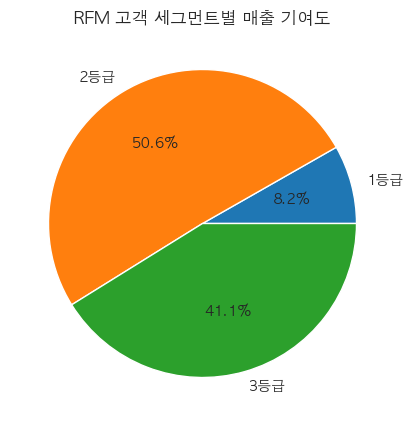

In [365]:
groupby_rfm_segment = df.groupby('rfm_segment').sum(numeric_only=True).reset_index()
groupby_rfm_segment['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='RFM 고객 세그먼트별 매출 기여도',
    ylabel='',
)

앞선 분석에서 Recency 등급은 등급별로 매출 기여도 차이가 거의 없었는데요. 
그렇다면 Recency 가중치를 줄이고 다른 항목의 가중치를 높였을 때, 
고객 세그먼트별 매출 기여도의 차이가 더 뚜렷해질 것이라고 추측할 수 있습니다. 
Recency 가중치를 0.2로 줄이고 다른 두 가중치는 동등하게 0.4씩 설정한 뒤 같은 과정을 반복해 봅시다

In [369]:
# Recency가 차이가 얼마없어서 이것을 제외하고 가중치를 높
# 가중치 재설정
weight['recency'] = 0.2
weight['frequency'] = 0.4
weight['monetary'] = 0.4

# 가중합 계산
df['rfm_score'] = (
    weight['recency'] * df['recency_grade'].astype('int')
    + weight['frequency'] * df['frequency_grade'].astype('int')
    + weight['monetary'] * df['monetary_grade'].astype('int')
)

# RFM 고객 지표 구간화
df['rfm_segment'] = df['rfm_score'].apply(rfm_segment_bins)

/var/folders/vh/dzvlggfx64b5xndshnbz77540000gn/T/ipykernel_84617/2088926719.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rfm_score'] = (
/var/folders/vh/dzvlggfx64b5xndshnbz77540000gn/T/ipykernel_84617/2088926719.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rfm_segment'] = df['rfm_score'].apply(rfm_segment_bins)


새로운 가중치로 고객 세그먼트를 나누니 이전 가중치로 나눴을 때에 비해 1등급과 2등급 세그먼트 고객의 수는 줄고 3등급 세그먼트 고객의 수가 많이 늘었네요.

In [367]:
df['rfm_segment'].value_counts()

rfm_segment
1    802
3    792
2    611
Name: count, dtype: int64

세그먼트별 매출 기여도를 파이 차트로 그려 보니 3등급 세그먼트의 매출 기여도가 70%에 육박합니다. 
2등급 세그먼트는 27% 정도, 1등급 세그먼트는 4%로, 3등급 세그먼트의 매출 기여도가 확연히 높군요. 
매출 기여도가 높은 3등급 세그먼트를 핵심 고객 그룹으로 생각하고 집중적으로 관리해 주면 앞으로도 매출에 도움이 되겠죠?

<Axes: title={'center': 'RFM 고객 세그먼트별 매출 기여도'}>

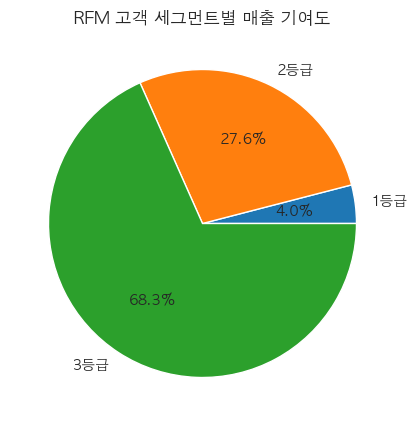

In [368]:
groupby_rfm_segment = df.groupby('rfm_segment').sum(numeric_only=True).reset_index()
groupby_rfm_segment['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='RFM 고객 세그먼트별 매출 기여도',
    ylabel='',
)